# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?"
city_list = []
max_temp_list = []
lat_list = []
lon_list = []
humidity_list = []
cloudiness_list = []
wind_list = []
country_list = []
date_list = []

print("                        ") 
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    
    city_name = city
    
    try:
        
        query_url = f"{url}appid={weather_api_key}&q={city_name}&units=imperial"
        
        weather_summary = requests.get(query_url).json()
        
        print(f"Processing Record {city} of Set {len(cities)} | {city_name}")
        
        max_temp_list.append(weather_summary["main"]["temp_max"])
        
        lat_list.append(weather_summary["coord"]["lat"])
        
        lon_list.append(weather_summary["coord"]["lon"])
        
        humidity_list.append(weather_summary["main"]["humidity"])
        
        cloudiness_list.append(weather_summary["clouds"]["all"])
        
        wind_list.append(weather_summary["wind"]["speed"])
        
        country_list.append(weather_summary["sys"]["country"])
        
        date_list.append(weather_summary["dt"])
        
        city_list.append(city_name)
        
        print(f"{city_name} found. Record completed.")
        
    except KeyError:
        print(f"{city_name} not found. Skipping...")
        
    time.sleep(1)

print("------------------------")            
print("Data Retrieval Complete")
print("                        ")

                        
Beginning Data Retrieval
------------------------
Processing Record punta arenas of Set 620 | punta arenas
punta arenas found. Record completed.
Processing Record khatanga of Set 620 | khatanga
khatanga found. Record completed.
Processing Record ushuaia of Set 620 | ushuaia
ushuaia found. Record completed.
Processing Record cabo san lucas of Set 620 | cabo san lucas
cabo san lucas found. Record completed.
Processing Record norman wells of Set 620 | norman wells
norman wells found. Record completed.
Processing Record saint-louis of Set 620 | saint-louis
saint-louis found. Record completed.
Processing Record murray bridge of Set 620 | murray bridge
murray bridge found. Record completed.
Processing Record puerto ayora of Set 620 | puerto ayora
puerto ayora found. Record completed.
Processing Record skalistyy of Set 620 | skalistyy
skalistyy not found. Skipping...
Processing Record rikitea of Set 620 | rikitea
rikitea found. Record completed.
Processing Record mys 

Processing Record saint-gabriel of Set 620 | saint-gabriel
saint-gabriel found. Record completed.
Processing Record sinnamary of Set 620 | sinnamary
sinnamary found. Record completed.
Processing Record mancio lima of Set 620 | mancio lima
mancio lima found. Record completed.
Processing Record virginia beach of Set 620 | virginia beach
virginia beach found. Record completed.
Processing Record tuktoyaktuk of Set 620 | tuktoyaktuk
tuktoyaktuk found. Record completed.
Processing Record tilichiki of Set 620 | tilichiki
tilichiki found. Record completed.
Processing Record sosnovka of Set 620 | sosnovka
sosnovka found. Record completed.
Processing Record coihaique of Set 620 | coihaique
coihaique found. Record completed.
Processing Record bredasdorp of Set 620 | bredasdorp
bredasdorp found. Record completed.
Processing Record qaanaaq of Set 620 | qaanaaq
qaanaaq found. Record completed.
Processing Record barentsburg of Set 620 | barentsburg
barentsburg not found. Skipping...
Processing Record

Processing Record viransehir of Set 620 | viransehir
viransehir found. Record completed.
Processing Record plettenberg bay of Set 620 | plettenberg bay
plettenberg bay found. Record completed.
Processing Record gannan of Set 620 | gannan
gannan found. Record completed.
Processing Record cadereyta of Set 620 | cadereyta
cadereyta found. Record completed.
Processing Record pestyaki of Set 620 | pestyaki
pestyaki found. Record completed.
Processing Record george of Set 620 | george
george found. Record completed.
Processing Record kodiak of Set 620 | kodiak
kodiak found. Record completed.
Processing Record roros of Set 620 | roros
roros found. Record completed.
Processing Record kambam of Set 620 | kambam
kambam found. Record completed.
Processing Record preobrazheniye of Set 620 | preobrazheniye
preobrazheniye found. Record completed.
Processing Record saskylakh of Set 620 | saskylakh
saskylakh found. Record completed.
Processing Record san andres of Set 620 | san andres
san andres found

KeyboardInterrupt: 

## Convert Raw Data to DataFrame
* Save as csv

In [5]:
weather_info = pd.DataFrame(
    {'City': city_list,
     'Lat': lat_list,
     'Lng': lon_list,
     'Max Temp' : max_temp_list,
     'Humidity': humidity_list,
     'Cloudiness' : cloudiness_list,
     'Wind Speed' : wind_list,
     'Country' : country_list,
     'Date' : date_list
    })

weather_info.head()


weather_info.to_csv("weather_info.csv",
                  encoding="utf-8", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

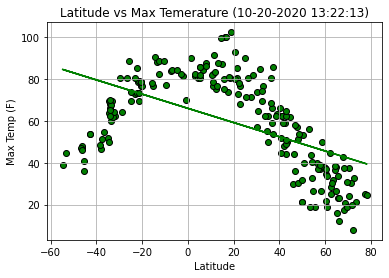

In [13]:
x_values = weather_info['Lat']
y_values = weather_info['Max Temp']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter Plot
plt.scatter(x_values,y_values, color="green", edgecolors="black")

# Line regression
plt.plot(x_values,regress_values,"g-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Latitude vs Max Temerature ({date})')
plt.grid()


plt.savefig("Latitude vs Max Temerature.png")
plt.show()

Analysis: The plot shows what you would expect, the closer to the equator you are, the hotter the temperature. 

### Latitude vs. Humidity Plot

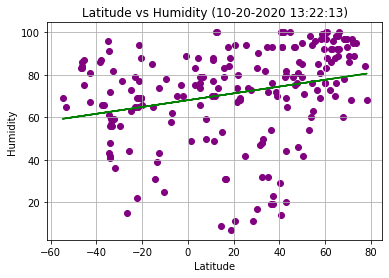

In [12]:
#Store Poverty Rate and Bank Count as x and y values
x_values = weather_info['Lat']
y_values = weather_info['Humidity']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Scatter plot
plt.scatter(x_values,y_values, color="purple", edgecolors="purple")

# Plot regression line
plt.plot(x_values,regress_values,"g-")

# Label
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs Humidity ({date})')
plt.grid()


# Show plot
plt.savefig("Latitude vs Humidity.png")
plt.show()

Analysis: There does not seem to be a correlation between humidity and latitude.

### Latitude vs. Cloudiness Plot

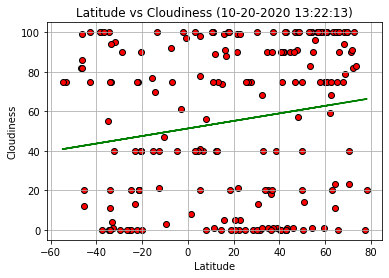

In [14]:
#Store Poverty Rate and Bank Count as x and y values
x_values = weather_info['Lat']
y_values = weather_info['Cloudiness']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="red", edgecolors="black")

# Plot regression line
plt.plot(x_values,regress_values,"g-")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness ({date})')
plt.grid()


# Show plot
plt.savefig("Latitude vs Cloudiness.png")
plt.show()

Analysis: There is no correlation between cloudiness and latitude. 

### Latitude vs. Wind Speed Plot

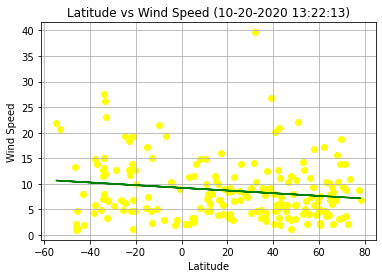

In [15]:
# Store Poverty Rate and Bank Count as x and y values
x_values = weather_info['Lat']
y_values = weather_info['Wind Speed']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="yellow", edgecolors="yellow")

# Plot regression line
plt.plot(x_values,regress_values,"g-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Latitude vs Wind Speed ({date})')
plt.grid()


# Show plot
plt.savefig("Latitude vs Wind Speed.png")
plt.show()

Analysis: There doesnt seem to be a correlation between wind speed and latitude. Most points for wind speed are below 15mph. 

## Linear Regression

### Write linear regression plot function (optional)

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

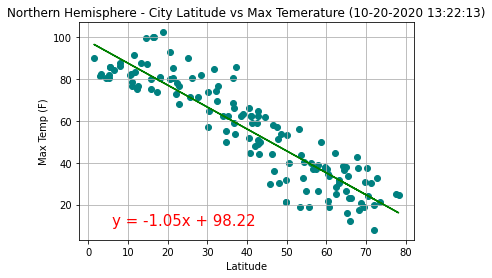

The r-value is: 0.8234001448388156


In [22]:
north_hem = weather_info.loc[(
    weather_info['Lat'] > 0)]

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="teal", edgecolors="teal")

# Plot regression line
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Northern Hemisphere - City Latitude vs Max Temerature ({date})')
plt.grid()


# Show plot
plt.savefig("Northern Hemisphere - City Latitude vs Max Temerature.png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: There is a strong correlation. The closer you are to the equator, the higher the max temperature. 

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

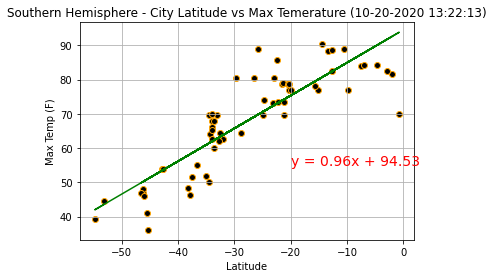

The r-value is 0.7411306220788204


In [20]:
south_hem = weather_info.loc[(
    weather_info['Lat'] < 0)]

x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="black", edgecolors="orange")

# Plot regression line
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(-20,55),fontsize=14,color="red")

# Label 
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Southern Hemisphere - City Latitude vs Max Temerature ({date})')
plt.grid()


# Show plot
plt.savefig("Southern Hemisphere - City Latitude vs Max Temerature.png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: Similar to the northern hemispehre. The closer you are the the equator, the higher the max temperature. 

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

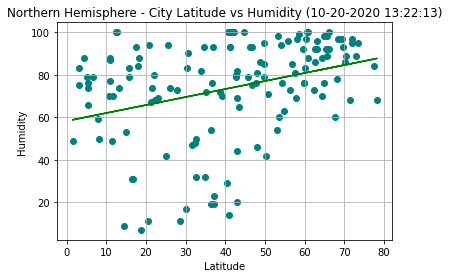

The r-value is 0.11129211987227086


In [21]:
north_hem = weather_info.loc[(
    weather_info['Lat'] > 0)]

x_values = north_hem['Lat']
y_values = north_hem['Humidity']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="teal", edgecolors="teal")

# Plot regression line
plt.plot(x_values,regress_values,"g-")


# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere - City Latitude vs Humidity ({date})')
plt.grid()


# Show plot
plt.savefig("Northern Hemisphere - City Latitude vs Humidity.png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: There does not a high correlation between humidity and latitude in the northern hemisphere. 

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

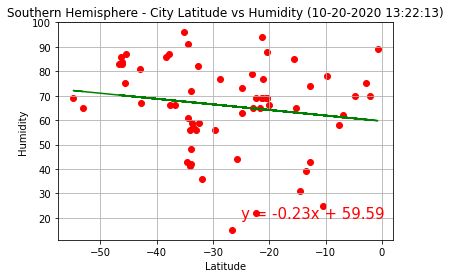

The r-value is 0.02678171903515767


In [23]:
south_hem = weather_info.loc[(
    weather_info['Lat'] < 0)]

x_values = south_hem['Lat']
y_values = south_hem['Humidity']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="red", edgecolors="red")

# Plot regression line
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Label 
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere - City Latitude vs Humidity ({date})')
plt.grid()


# Show plot
plt.savefig("Southern Hemisphere - City Latitude vs Humidity.png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: Similar to the northern hemisphere, there does not seem to be a high correlation between latitude and humidity. 

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

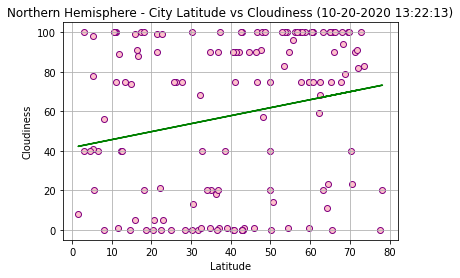

The r-value is 0.04429888892772529


In [27]:
north_hem = weather_info.loc[(
    weather_info['Lat'] > 0)]

x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="pink", edgecolors="purple")

# Plot regression line
plt.plot(x_values,regress_values,"g-")

# Label 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere - City Latitude vs Cloudiness ({date})')
plt.grid()


# Show plot
plt.savefig("Northern Hemisphere - City Latitude vs Cloudiness .png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: Not much correlation. Slightly more clouds when farther from the equator. 

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

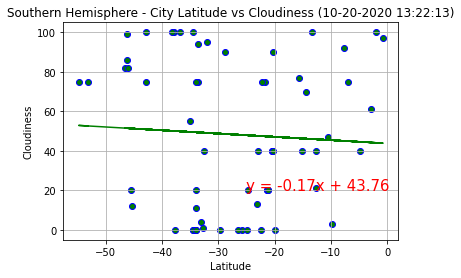

The r-value is 0.0033370532121003117


In [28]:
south_hem = weather_info.loc[(
    weather_info['Lat'] < 0)]

x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green", edgecolors="blue")

# Plot regression line
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Label 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere - City Latitude vs Cloudiness ({date})')
plt.grid()


# Show plot
plt.savefig("Southern Hemisphere - City Latitude vs Cloudiness.png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: There is no correlation.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

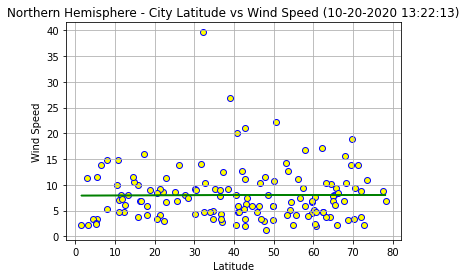

The r-value is 3.8950323109547166e-05


In [29]:
north_hem = weather_info.loc[(
    weather_info['Lat'] > 0)]

x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="yellow", edgecolors="blue")

# Plot regression line
plt.plot(x_values,regress_values,"g-")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere - City Latitude vs Wind Speed ({date})')
plt.grid()


# Show plot
plt.savefig("Northern Hemisphere - City Latitude vs Wind Speed.png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: There is no correlation between latitude and wind speed. 

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

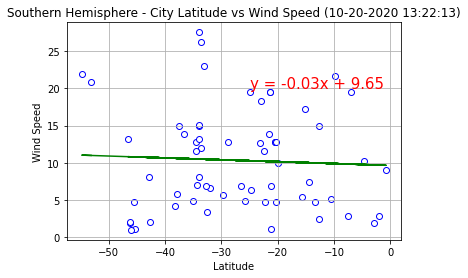

The r-value is 0.002329986838964942


In [30]:
south_hem = weather_info.loc[(
    weather_info['Lat'] < 0)]

x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
date = weather_info['Date'].mean()
date = datetime.utcfromtimestamp(date).strftime('%m-%d-%Y %H:%M:%S')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="white", edgecolors="blue")

# Plot regression line
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere - City Latitude vs Wind Speed ({date})')
plt.grid()


# Show plot
plt.savefig("Southern Hemisphere - City Latitude vs Wind Speed.png")
plt.show()

print(f"The r-value is {rvalue**2}")

Analysis: There is no correlation between latitude and the souther hemisphere. 

Observable Trends: 
1. In both the northern and southern hemispheres there is no correlation between wind speed and latitude. 
2. There is more of a correlation in the northern hemisphere vs the southern hemisphere for cloudiness and latitude.
3. Both the southern and northern hemisphere have a high correlation between latitude and temprature. The closer you are to the equator, the hotter it is. 